# ROC curves
## Comparison of different trainings with different setups for inference

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import mplhep as hep
import pandas

plt.style.use(hep.cms.style.ROOT)

In [2]:
plt.rcParams['axes.axisbelow'] = True

In [3]:
#model_names = ['nominal', 'adversarial_eps0p01', 'adversarial_eps0p005']
model_names = ['nominal']
prediction_setups = ['', '_FGSM']
prediction_files = 'outfiles'

In [4]:
tagger = 'DF_Run2' # 'DF'

In [5]:
dirz = [[f'/eos/user/h/heschone/DeepJet/Train_{tagger}/{model_name}/predict{prediction_setup}/' \
        for model_name in model_names] for prediction_setup in prediction_setups]

In [6]:
dirz

[['/eos/user/h/heschone/DeepJet/Train_DF_Run2/nominal/predict/'],
 ['/eos/user/h/heschone/DeepJet/Train_DF_Run2/nominal/predict_FGSM/']]

In [7]:
#dirz[0][0] = '/e'+dirz[0][0].strip('predict/')+'/predict_NEW/'
#dirz[1][0] = '/e'+dirz[1][0].strip('predict_FGSM/')+'/predict_FGSM_NEW/'

In [8]:
dirz

[['/eos/user/h/heschone/DeepJet/Train_DF_Run2/nominal/predict/'],
 ['/eos/user/h/heschone/DeepJet/Train_DF_Run2/nominal/predict_FGSM/']]

In [9]:
BvsL_paths = [item + f'BvL_{prediction_files}.npy' for sublist in dirz for item in sublist]

In [10]:
BvsL_paths

['/eos/user/h/heschone/DeepJet/Train_DF_Run2/nominal/predict/BvL_outfiles.npy',
 '/eos/user/h/heschone/DeepJet/Train_DF_Run2/nominal/predict_FGSM/BvL_outfiles.npy']

In [11]:
BvsC_paths = [item + f'BvC_{prediction_files}.npy' for sublist in dirz for item in sublist]

In [12]:
BvsC_paths

['/eos/user/h/heschone/DeepJet/Train_DF_Run2/nominal/predict/BvC_outfiles.npy',
 '/eos/user/h/heschone/DeepJet/Train_DF_Run2/nominal/predict_FGSM/BvC_outfiles.npy']

In [13]:
NEW_BvsL_paths = [item + f'BvL_{prediction_files}_NEW.npy' for sublist in dirz for item in sublist]

In [14]:
NEW_BvsL_paths

['/eos/user/h/heschone/DeepJet/Train_DF_Run2/nominal/predict/BvL_outfiles_NEW.npy',
 '/eos/user/h/heschone/DeepJet/Train_DF_Run2/nominal/predict_FGSM/BvL_outfiles_NEW.npy']

In [15]:
#NEW_BvsL_paths[1] = NEW_BvsL_paths[1].strip('_NEW.npy')+'.npy'
#NEW_BvsL_paths[3] = NEW_BvsL_paths[3].strip('_NEW.npy')+'.npy'
#NEW_BvsL_paths

In [16]:
NEW_CvsB_paths = [item + f'CvB_{prediction_files}_NEW.npy' for sublist in dirz for item in sublist]

In [17]:
NEW_CvsB_paths

['/eos/user/h/heschone/DeepJet/Train_DF_Run2/nominal/predict/CvB_outfiles_NEW.npy',
 '/eos/user/h/heschone/DeepJet/Train_DF_Run2/nominal/predict_FGSM/CvB_outfiles_NEW.npy']

In [18]:
#NEW_CvsB_paths[1] = NEW_CvsB_paths[1].strip('_NEW.npy')+'.npy'
#NEW_CvsB_paths[3] = NEW_CvsB_paths[3].strip('_NEW.npy')+'.npy'
#NEW_CvsB_paths

In [19]:
NEW_CvsL_paths = [item + f'CvL_{prediction_files}_NEW.npy' for sublist in dirz for item in sublist]

In [20]:
NEW_CvsL_paths

['/eos/user/h/heschone/DeepJet/Train_DF_Run2/nominal/predict/CvL_outfiles_NEW.npy',
 '/eos/user/h/heschone/DeepJet/Train_DF_Run2/nominal/predict_FGSM/CvL_outfiles_NEW.npy']

In [21]:
#NEW_CvsL_paths[1] = NEW_CvsL_paths[1].strip('_NEW.npy')+'.npy'
#NEW_CvsL_paths[3] = NEW_CvsL_paths[3].strip('_NEW.npy')+'.npy'
#NEW_CvsL_paths

In [22]:
xya = np.load(NEW_BvsL_paths[0], allow_pickle=True)

In [23]:
"""
fig,ax = plt.subplots(figsize=[12,12])
ax.set_xlim(left=0.,right=1)

ax.set_yscale('log')
ax.set_ylim(bottom=1e-3)
ax.set_ylim(top=1)

tag_name = ' (b,bb,lepb)'
mistag_name = ' (uds,g)'

ax.set_ylabel('Mistagging rate'+mistag_name)
ax.set_xlabel('Tagging efficiency'+tag_name)

ax.grid(which='minor', alpha=0.85)
ax.grid(which='major', alpha=0.95, color='black')

linestyles = ['-','-','-','--','--','--']
colors = ['tab:blue','tab:orange','tab:green','tab:blue','tab:orange','tab:green']
names_models = ['Nominal training', r'Adversarial training (against $\epsilon=0.01$)',
                r'Adversarial training (against $\epsilon=0.005$)']
names_setups = ['nominal samples', r'FGSM ($\epsilon=0.01$, limit $20\%$)']
legtitle = 'BvsL'
legloc = 'upper left'
for i in range(6):
    xya = np.load(BvsL_paths[i], allow_pickle=True)
    legend_text = names_models[i % 3] + '\n' + (names_setups[0] if i<3 else names_setups[1]) + '\n' + 'AUC = ' + f'{xya[2]:.3f}'
    ax.plot(xya[0], xya[1], linestyle=linestyles[i], color=colors[i],linewidth=3.0,label=legend_text)
leg = ax.legend(title=legtitle,loc=legloc,fontsize=16,title_fontsize=20,labelspacing=0.7,frameon=True,framealpha=1,facecolor='white')
if 'right' in legloc:
    aligned = 'right'
else:
    aligned = 'left'
leg._legend_box.align = aligned
leg.get_frame().set_linewidth(0.0)
#hep.cms.text('Simulation Preliminary')
hep.cms.label(rlabel='(13 TeV)')
#hep.cms.rlabel('13 TeV')
#fig.savefig(legtitle + '_' + tagger + '_ROC.pdf', bbox_inches='tight')
"""

"\nfig,ax = plt.subplots(figsize=[12,12])\nax.set_xlim(left=0.,right=1)\n\nax.set_yscale('log')\nax.set_ylim(bottom=1e-3)\nax.set_ylim(top=1)\n\ntag_name = ' (b,bb,lepb)'\nmistag_name = ' (uds,g)'\n\nax.set_ylabel('Mistagging rate'+mistag_name)\nax.set_xlabel('Tagging efficiency'+tag_name)\n\nax.grid(which='minor', alpha=0.85)\nax.grid(which='major', alpha=0.95, color='black')\n\nlinestyles = ['-','-','-','--','--','--']\ncolors = ['tab:blue','tab:orange','tab:green','tab:blue','tab:orange','tab:green']\nnames_models = ['Nominal training', r'Adversarial training (against $\\epsilon=0.01$)',\n                r'Adversarial training (against $\\epsilon=0.005$)']\nnames_setups = ['nominal samples', r'FGSM ($\\epsilon=0.01$, limit $20\\%$)']\nlegtitle = 'BvsL'\nlegloc = 'upper left'\nfor i in range(6):\n    xya = np.load(BvsL_paths[i], allow_pickle=True)\n    legend_text = names_models[i % 3] + '\n' + (names_setups[0] if i<3 else names_setups[1]) + '\n' + 'AUC = ' + f'{xya[2]:.3f}'\n    ax.

In [24]:
"""
fig,ax = plt.subplots(figsize=[12,12])
ax.set_xlim(left=0.,right=1)

ax.set_yscale('log')
ax.set_ylim(bottom=1e-3)
ax.set_ylim(top=1)

tag_name = ' (b,bb,lepb)'
mistag_name = ' (c)'

ax.set_ylabel('Mistagging rate'+mistag_name)
ax.set_xlabel('Tagging efficiency'+tag_name)

ax.grid(which='minor', alpha=0.85)
ax.grid(which='major', alpha=0.95, color='black')

linestyles = ['-','-','-','--','--','--']
colors = ['tab:blue','tab:orange','tab:green','tab:blue','tab:orange','tab:green']
names_models = ['Nominal training', r'Adversarial training (against $\epsilon=0.01$)',
                r'Adversarial training (against $\epsilon=0.005$)']
names_setups = ['nominal samples', r'FGSM ($\epsilon=0.01$, limit $20\%$)']
legtitle = 'BvsC'
legloc = 'upper left'
for i in range(6):
    xya = np.load(BvsC_paths[i], allow_pickle=True)
    legend_text = names_models[i % 3] + '\n' + (names_setups[0] if i<3 else names_setups[1]) + '\n' + 'AUC = ' + f'{xya[2]:.3f}'
    ax.plot(xya[0], xya[1], linestyle=linestyles[i], color=colors[i],linewidth=3.0,label=legend_text)
leg = ax.legend(title=legtitle,loc=legloc,fontsize=16,title_fontsize=20,labelspacing=0.7,frameon=True,framealpha=1,facecolor='white')
if 'right' in legloc:
    aligned = 'right'
else:
    aligned = 'left'
leg._legend_box.align = aligned
leg.get_frame().set_linewidth(0.0)
hep.cms.label(rlabel='(13 TeV)')
#fig.savefig(legtitle + '_' + tagger + '_ROC.pdf', bbox_inches='tight')
"""

"\nfig,ax = plt.subplots(figsize=[12,12])\nax.set_xlim(left=0.,right=1)\n\nax.set_yscale('log')\nax.set_ylim(bottom=1e-3)\nax.set_ylim(top=1)\n\ntag_name = ' (b,bb,lepb)'\nmistag_name = ' (c)'\n\nax.set_ylabel('Mistagging rate'+mistag_name)\nax.set_xlabel('Tagging efficiency'+tag_name)\n\nax.grid(which='minor', alpha=0.85)\nax.grid(which='major', alpha=0.95, color='black')\n\nlinestyles = ['-','-','-','--','--','--']\ncolors = ['tab:blue','tab:orange','tab:green','tab:blue','tab:orange','tab:green']\nnames_models = ['Nominal training', r'Adversarial training (against $\\epsilon=0.01$)',\n                r'Adversarial training (against $\\epsilon=0.005$)']\nnames_setups = ['nominal samples', r'FGSM ($\\epsilon=0.01$, limit $20\\%$)']\nlegtitle = 'BvsC'\nlegloc = 'upper left'\nfor i in range(6):\n    xya = np.load(BvsC_paths[i], allow_pickle=True)\n    legend_text = names_models[i % 3] + '\n' + (names_setups[0] if i<3 else names_setups[1]) + '\n' + 'AUC = ' + f'{xya[2]:.3f}'\n    ax.plot

# NEW

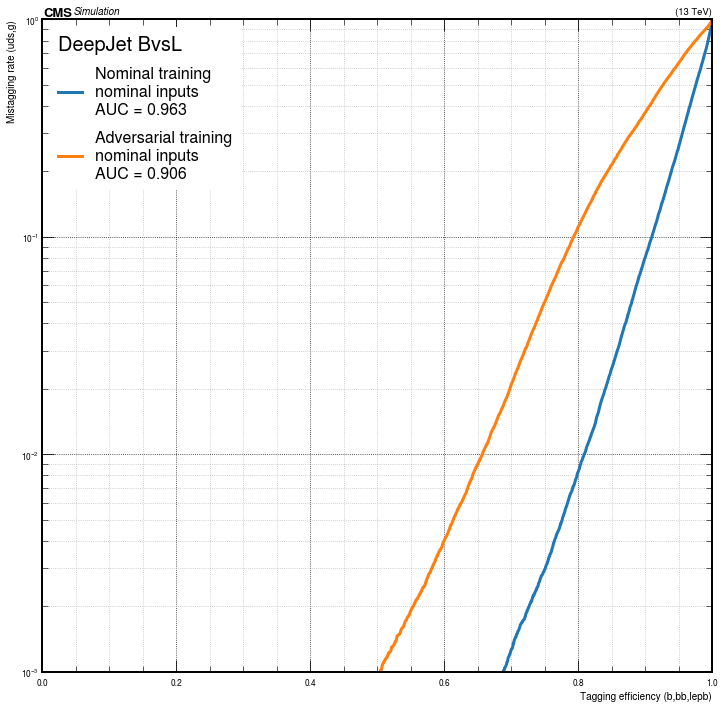

In [25]:
fig,ax = plt.subplots(figsize=[12,12])
ax.set_xlim(left=0.,right=1)

ax.set_yscale('log')
ax.set_ylim(bottom=1e-3)
ax.set_ylim(top=1)

tag_name = ' (b,bb,lepb)'
mistag_name = ' (uds,g)'

ax.set_ylabel('Mistagging rate'+mistag_name)
ax.set_xlabel('Tagging efficiency'+tag_name)

ax.grid(which='minor', alpha=0.85)
ax.grid(which='major', alpha=0.95, color='black')

linestyles = ['-','-','--','--']
colors = ['tab:blue','tab:orange','tab:blue','tab:orange',]
#names_models = ['Nominal training', r'Adversarial training (against $\epsilon=0.01$)']
names_models = ['Nominal training', r'Adversarial training']
names_setups = ['nominal inputs', r'adversarial inputs']
legtitle = 'BvsL'
legloc = 'upper left'
for i in range(2):
    xya = np.load(NEW_BvsL_paths[i], allow_pickle=True)
    legend_text = names_models[i % 2] + '\n' + (names_setups[0] if i<2 else names_setups[1]) + '\n' + 'AUC = ' + f'{xya[2]:.3f}'
    ax.plot(xya[0], xya[1], linestyle=linestyles[i], color=colors[i],linewidth=3.0,label=legend_text)
leg = ax.legend(title='DeepJet '+legtitle,loc=legloc,fontsize=16,title_fontsize=20,labelspacing=0.7,frameon=True,framealpha=1,facecolor='white')
if 'right' in legloc:
    aligned = 'right'
else:
    aligned = 'left'
leg._legend_box.align = aligned
leg.get_frame().set_linewidth(0.0)
hep.cms.label(rlabel='(13 TeV)')
fig.savefig(legtitle + '_' + tagger + '_NEW_ROC_v2.pdf', bbox_inches='tight')
fig.savefig(legtitle + '_' + tagger + '_NEW_ROC_v2.png', bbox_inches='tight', dpi=900, facecolor='w', transparent=False)

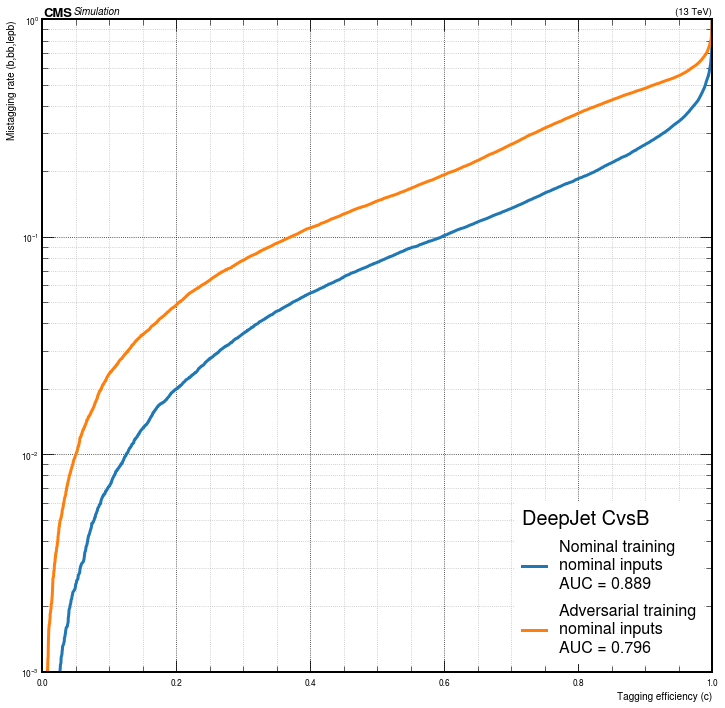

In [26]:
fig,ax = plt.subplots(figsize=[12,12])
ax.set_xlim(left=0.,right=1)

ax.set_yscale('log')
ax.set_ylim(bottom=1e-3)
ax.set_ylim(top=1)

tag_name = ' (c)'
mistag_name = ' (b,bb,lepb)'

ax.set_ylabel('Mistagging rate'+mistag_name)
ax.set_xlabel('Tagging efficiency'+tag_name)

ax.grid(which='minor', alpha=0.85)
ax.grid(which='major', alpha=0.95, color='black')

linestyles = ['-','-','--','--']
colors = ['tab:blue','tab:orange','tab:blue','tab:orange',]
#names_models = ['Nominal training', r'Adversarial training (against $\epsilon=0.01$)']
names_models = ['Nominal training', r'Adversarial training']
names_setups = ['nominal inputs', r'adversarial inputs']
legtitle = 'CvsB'
legloc = 'lower right'
for i in range(2):
    xya = np.load(NEW_CvsB_paths[i], allow_pickle=True)
    legend_text = names_models[i % 2] + '\n' + (names_setups[0] if i<2 else names_setups[1]) + '\n' + 'AUC = ' + f'{xya[2]:.3f}'
    ax.plot(xya[0], xya[1], linestyle=linestyles[i], color=colors[i],linewidth=3.0,label=legend_text)
leg = ax.legend(title='DeepJet '+legtitle,loc=legloc,fontsize=16,title_fontsize=20,labelspacing=0.7,frameon=True,framealpha=1,facecolor='white')
if 'right' in legloc:
    aligned = 'left'#'right'
else:
    aligned = 'left'
leg._legend_box.align = aligned
leg.get_frame().set_linewidth(0.0)
hep.cms.label(rlabel='(13 TeV)')
fig.savefig(legtitle + '_' + tagger + '_NEW_ROC_v2.pdf', bbox_inches='tight')
fig.savefig(legtitle + '_' + tagger + '_NEW_ROC_v2.png', bbox_inches='tight', dpi=900, facecolor='w', transparent=False)

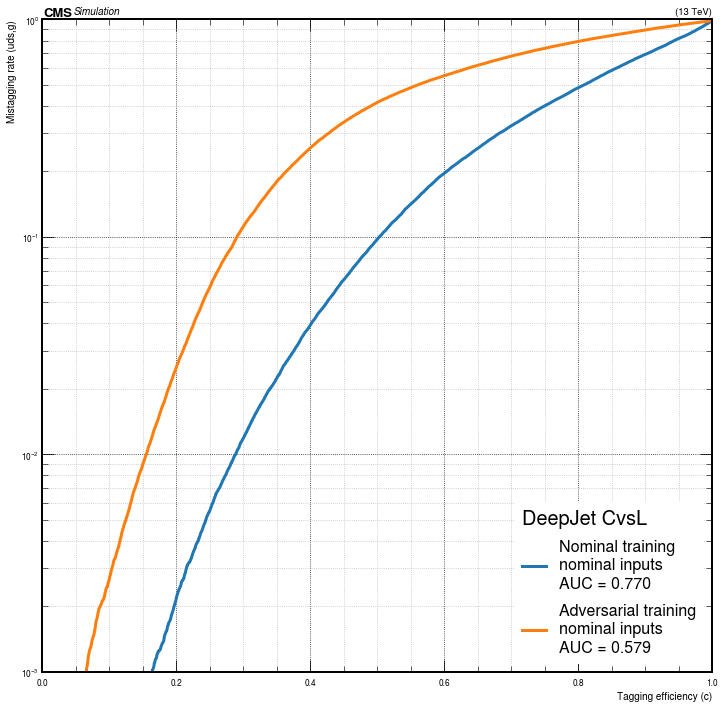

In [27]:
fig,ax = plt.subplots(figsize=[12,12])
ax.set_xlim(left=0.,right=1)

ax.set_yscale('log')
ax.set_ylim(bottom=1e-3)
ax.set_ylim(top=1)

tag_name = ' (c)'
mistag_name = ' (uds,g)'

ax.set_ylabel('Mistagging rate'+mistag_name)
ax.set_xlabel('Tagging efficiency'+tag_name)

ax.grid(which='minor', alpha=0.85)
ax.grid(which='major', alpha=0.95, color='black')

linestyles = ['-','-','--','--']
colors = ['tab:blue','tab:orange','tab:blue','tab:orange',]
#names_models = ['Nominal training', r'Adversarial training (against $\epsilon=0.01$)']
names_models = ['Nominal training', r'Adversarial training']
names_setups = ['nominal inputs', r'adversarial inputs']
legtitle = 'CvsL'
legloc = 'lower right'
for i in range(2):
    xya = np.load(NEW_CvsL_paths[i], allow_pickle=True)
    legend_text = names_models[i % 2] + '\n' + (names_setups[0] if i<2 else names_setups[1]) + '\n' + 'AUC = ' + f'{xya[2]:.3f}'
    ax.plot(xya[0], xya[1], linestyle=linestyles[i], color=colors[i],linewidth=3.0,label=legend_text)
leg = ax.legend(title='DeepJet '+legtitle,loc=legloc,fontsize=16,title_fontsize=20,labelspacing=0.7,frameon=True,framealpha=1,facecolor='white')
if 'right' in legloc:
    aligned = 'left'#'right'
else:
    aligned = 'left'
leg._legend_box.align = aligned
leg.get_frame().set_linewidth(0.0)
hep.cms.label(rlabel='(13 TeV)')
fig.savefig(legtitle + '_' + tagger + '_NEW_ROC_v2.pdf', bbox_inches='tight')
fig.savefig(legtitle + '_' + tagger + '_NEW_ROC_v2.png', bbox_inches='tight', dpi=900, facecolor='w', transparent=False)